In [52]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline

In [53]:
from tensorflow.keras.datasets import mnist 
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [54]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [55]:
from tensorflow.keras.utils import to_categorical

In [56]:
y_train.shape

(60000,)

In [57]:
y_example.shape

(60000, 10)

In [58]:
y_cat_test=to_categorical(y_test)

In [59]:
y_cat_train=to_categorical(y_train)

In [60]:
#normalize the data
X_train=X_train/255
X_test=X_test/255

In [61]:
#batch_size, width,height,color_channels
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [62]:
from tensorflow.keras.models import Sequential

In [63]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [64]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
#output
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [66]:
model.fit(X_train,y_cat_train,batch_size=512,epochs=10,validation_data=(X_test,y_cat_test),callbacks=early_stop)

Epoch 1/10
118/118 [==============================] - 29s 244ms/step - loss: 0.3852 - accuracy: 0.8939 - val_loss: 0.1358 - val_accuracy: 0.9617
Epoch 2/10
118/118 [==============================] - 24s 207ms/step - loss: 0.1090 - accuracy: 0.9692 - val_loss: 0.0745 - val_accuracy: 0.9779
Epoch 3/10
118/118 [==============================] - 22s 190ms/step - loss: 0.0672 - accuracy: 0.9808 - val_loss: 0.0502 - val_accuracy: 0.9858
Epoch 4/10
118/118 [==============================] - 23s 195ms/step - loss: 0.0508 - accuracy: 0.9855 - val_loss: 0.0515 - val_accuracy: 0.9844


&lt;tensorflow.python.keras.callbacks.History at 0x211c11fee20&gt;

In [67]:
metric=pd.DataFrame(model.history.history)

In [68]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.598620,0.836200,76.770233,0.6324
1,0.469135,0.865917,66.520721,0.7072
2,0.413168,0.879867,56.145889,0.7711
3,0.381605,0.887817,49.280106,0.8097
4,0.360583,0.893500,47.427967,0.8246
5,0.343754,0.897467,46.862919,0.8357
6,0.331773,0.901667,41.798092,0.8576
7,0.318311,0.905000,39.444473,0.8694
8,0.307321,0.908950,37.325569,0.8780
9,0.295482,0.912183,38.729473,0.8810


&lt;AxesSubplot:&gt;

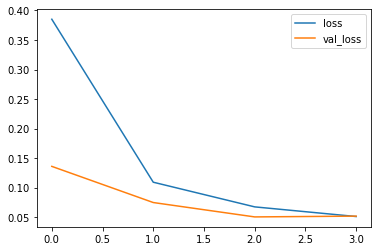

In [69]:
metric[['loss','val_loss']].plot()

&lt;AxesSubplot:&gt;

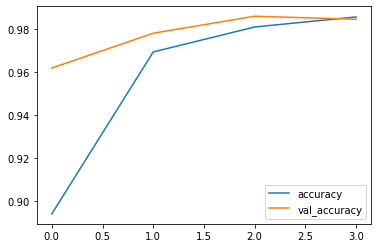

In [70]:
metric[['accuracy','val_accuracy']].plot()

In [71]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.05150274187326431, 0.9843999743461609]

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
predictions=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) &gt; 0.5).astype(&quot;int32&quot;)`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       1.00      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [76]:
confusion_matrix(y_test,predictions)

array([[ 976,    0,    2,    0,    0,    1,    0,    1,    0,    0],
       [   0, 1130,    2,    0,    0,    1,    0,    0,    2,    0],
       [   1,    4, 1023,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    3, 1001,    0,    1,    0,    2,    3,    0],
       [   1,    0,    6,    0,  971,    0,    0,    0,    1,    3],
       [   2,    0,    0,    4,    0,  885,    1,    0,    0,    0],
       [   8,    2,    0,    0,    2,    9,  934,    0,    3,    0],
       [   1,    3,   11,    3,    0,    0,    0, 1009,    1,    0],
       [   5,    1,    7,    1,    1,    2,    0,    2,  955,    0],
       [   5,    8,    2,    7,    9,    5,    0,   11,    2,  960]],
      dtype=int64)

&lt;AxesSubplot:&gt;

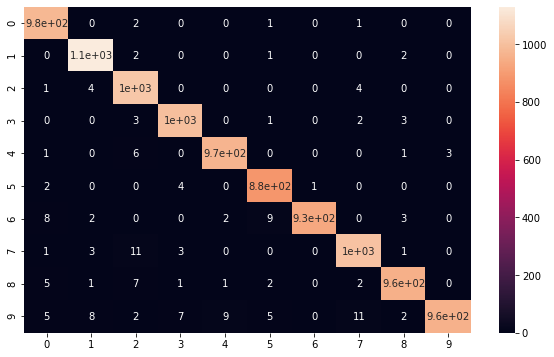

In [77]:
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

&lt;matplotlib.image.AxesImage at 0x211bf975ca0&gt;

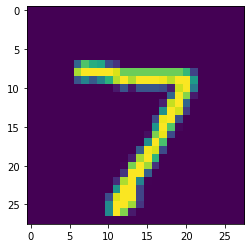

In [79]:
mynumber=X_test[0].reshape(28,28)
plt.imshow(mynumber)

In [80]:
model.predict_classes(mynumber.reshape(1,28,28,1))

array([7], dtype=int64)

In [81]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)